#  To predict the type of Mushroom- (Decision Tree, Random Forest)

### 1.1 Explain about Data Set Information:( Mushroom Classification )

**Attribute Information**


### 1.2. Loading Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Read the csv file into a Panda Dataframe

In [53]:
mushroom=pd.read_csv('C:\\Python_Training\\Python_Labs\\SLC\\mushrooms.csv')

### 1.3.Importing the dataset(mushrooms.csv):

In [54]:
mushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 1.4 Check the sample data head and do some simple analysis on the dataset

In [55]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [56]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [57]:
# Conclusion: All features are categorical in nature.

In [58]:
mushroom.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [59]:
#Conclusion: No null values in the dataset

### 1.5. Explain about DataFrame.describe() 

In [60]:
mushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 1.6 Check the distribution of the target class using countplot?
Here the data is almost evenly distributed

In [61]:
mushroom['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

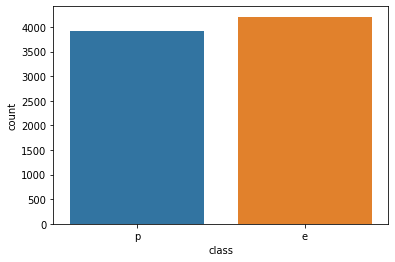

In [62]:
sns.countplot(x=mushroom['class'],data=mushroom)
plt.show()

### 1.7 Apply LabelEncoder for target variable ?

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mushroom['class_code']=le.fit_transform(mushroom['class'])
mushroom[['class','class_code']].head()

,class,class_code
0,p,1
1,e,0
2,e,0
3,p,1
4,e,0


### 1.8. Exploratory Data Analysis

### Try the Pairplot we can find there is no use plotting that?

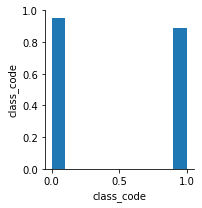

In [64]:
sns.pairplot(mushroom,size=3)
plt.show()

### 1.9Try to create sub plots? 

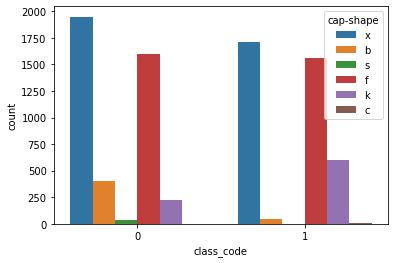

In [66]:
sns.countplot(x='class_code', hue = 'cap-shape', data = mushroom)
plt.show()

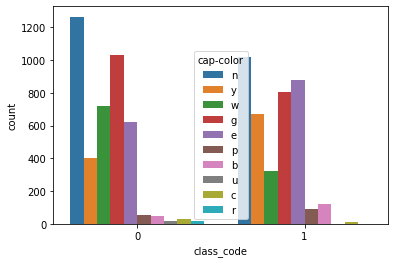

In [69]:
sns.countplot(x='class_code', hue = 'cap-color', data = mushroom)
plt.show()

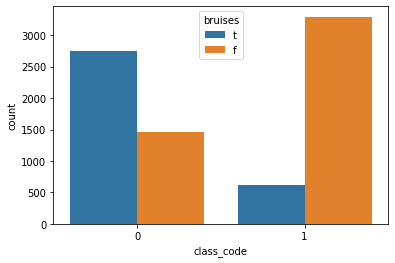

In [71]:
sns.countplot(x='class_code', hue = 'bruises', data = mushroom)
plt.show()

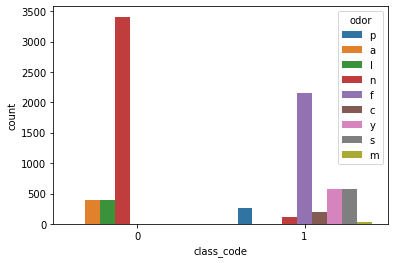

In [72]:
sns.countplot(x='class_code', hue = 'odor', data = mushroom)
plt.show()

### 1.10 Check-out the all the columns present in the dataframe

In [73]:
mushroom.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'class_code'],
      dtype='object')

###### 1.10 a) Since these are categorical variables without any definite order(nominal variables),dummy variables has to be created for all the  categorical variables.

In [74]:
mushroom=pd.get_dummies(data=mushroom, columns =['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat'], drop_first =False)

#### 1.10 b) Check out the head of the dataframe, this has created 119 columns!

In [75]:
mushroom.head()

,class,class_code,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,e,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,p,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
mushroom.shape

(8124, 119)

### 1.11 Extract the independent variable X and dependent variable Y?

In [78]:
X=mushroom.drop(['class_code','class'],axis=1)
y=mushroom['class_code']

### 1.12 Split the data into train and test set:(70/30)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

### 1.13. Implement 4 Machine Learning Models 

Let us explore the various classification algorithms and check which performs well on this dataset.
Below are the various different algorithms we are going to explore.

* Decision Tree

* Random Forest


### 1.13 a)  Build the Model for Decision tree classifier 

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [81]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix

In [82]:
y_train_pred_DT=dt.predict(X_train)
y_train_prob_DT=dt.predict_proba(X_train)[:,1]
y_test_pred_DT=dt.predict(X_test)
y_test_prob_DT=dt.predict_proba(X_test)[:,1]

print('Accuracy of training data set:',accuracy_score(y_train,y_train_pred_DT))
print('Accuracy of testing data set:',accuracy_score(y_test,y_test_pred_DT))
print('\n')
print('AUC score of training data:',roc_auc_score(y_train,y_train_prob_DT))
print('AUC score of testing data:',roc_auc_score(y_test,y_test_prob_DT))

Accuracy of training data set: 1.0
Accuracy of testing data set: 1.0


AUC score of training data: 1.0
AUC score of testing data: 1.0


### 1.13 b)  Build the Model for Random Forest**

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [84]:
y_train_pred_RF=rf.predict(X_train)
y_train_prob_RF=rf.predict_proba(X_train)[:,1]
y_test_pred_RF=rf.predict(X_test)
y_test_prob_RF=rf.predict_proba(X_test)[:,1]

print('Accuracy of training data set:',accuracy_score(y_train,y_train_pred_RF))
print('Accuracy of testing data set:',accuracy_score(y_test,y_test_pred_RF))
print('\n')
print('AUC score of training data:',roc_auc_score(y_train,y_train_prob_RF))
print('AUC score of testing data:',roc_auc_score(y_test,y_test_prob_RF))

Accuracy of training data set: 1.0
Accuracy of testing data set: 1.0


AUC score of training data: 1.0
AUC score of testing data: 1.0


### 1. 14.Which is the best Model :



In [86]:
from sklearn.model_selection import cross_val_score
accuracy_dt_cv=cross_val_score(dt,X_train,y_train,scoring='roc_auc',cv=3).mean()
accuracy_rf_cv=cross_val_score(rf,X_train,y_train,scoring='roc_auc',cv=3).mean()

print('Accuracy of Decision Tree Model:',accuracy_dt_cv)
print('Accuracy of Random Forest Model:',accuracy_rf_cv)

Accuracy of Decision Tree Model: 0.9996372869060574
Accuracy of Random Forest Model: 1.0
